['PAD', 'UNK', 'aag', 'aames', 'aaron', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abandons', 'abbey', 'abbot', 'abbott', 'abby', 'abc', 'abcs', 'abducted', 'abduction', 'abe', 'abetted']
Vocabulary size: 17502
Total words: 2539074


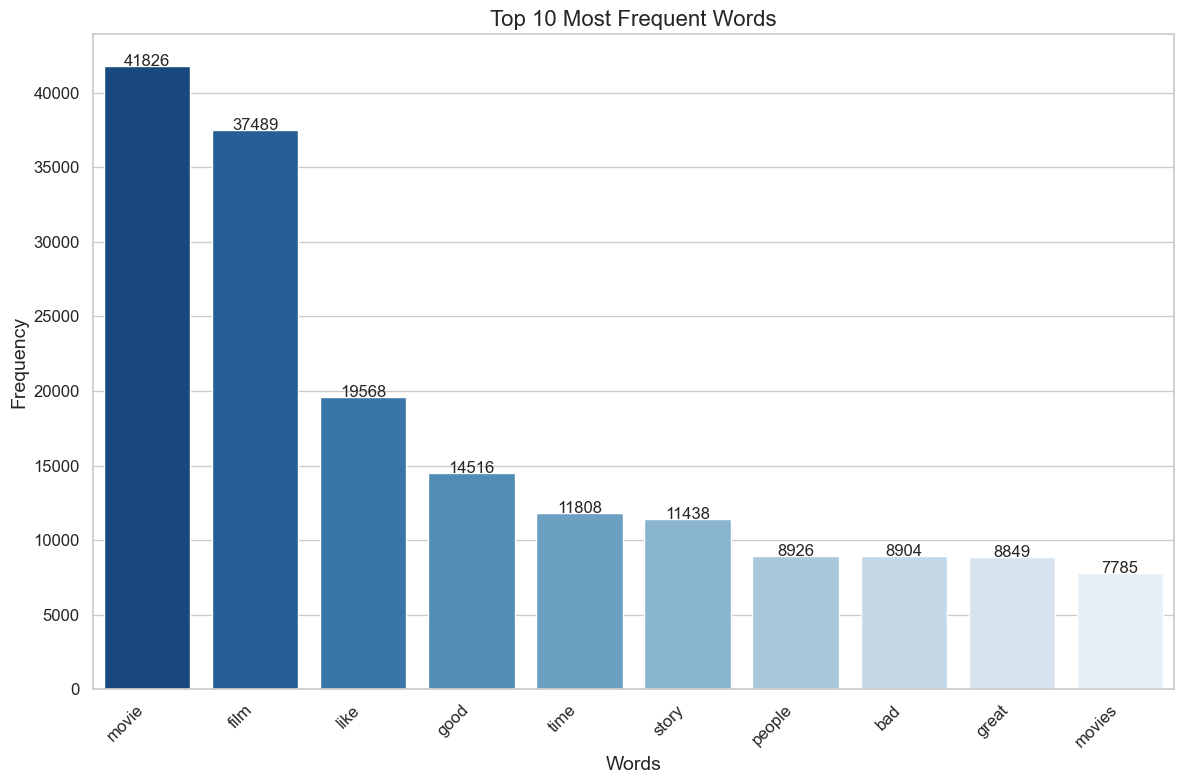

Vocabulary size: 17502
Train indices shape: 25000
Test indices shape: 25000
Average sentence length: 105 tokens


In [12]:
import pandas as pd
from collections import Counter
import ast
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv("train_data_preprocessed_new.csv")
test_data = pd.read_csv("test_data_preprocessed_new.csv")

max_vocab_size = 17500
min_freq = 5

def build_vocab(tokenized_reviews, min_freq=10, max_vocab_size=25000):
    counter = Counter()
    for review in tokenized_reviews:
        tokens = ast.literal_eval(review)
        tokens = [token for token in tokens if len(token) > 2]
        counter.update(tokens)
    
    vocab = [word for word, freq in counter.most_common(max_vocab_size) if freq >= min_freq]
    vocab = sorted(vocab)
    vocab = ['PAD', 'UNK'] + vocab

    word_to_idx = {word: idx for idx, word in enumerate(vocab)}
    idx_to_word = {idx: word for word, idx in word_to_idx.items()}
    
    print(vocab[:20])
    print(f"Vocabulary size: {len(vocab)}")

    return word_to_idx, idx_to_word, counter

word_to_idx, idx_to_word, word_counts = build_vocab(train_data['tokenized_review'], min_freq=min_freq, max_vocab_size=max_vocab_size)

def plot_word_count(word_counts, top_n=10):
    most_common = word_counts.most_common(top_n)
    words, counts = zip(*most_common)
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x=list(words), y=list(counts), palette='Blues_r')
    for i, count in enumerate(counts):
        ax.text(i, count + 0.5, f'{count}', ha='center', fontsize=12)
    plt.xlabel('Words', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title(f'Top {top_n} Most Frequent Words', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

print(f"Total words: {sum(word_counts.values())}")
plot_word_count(word_counts, top_n=10)

vocab_size = len(word_to_idx)
print(f"Vocabulary size: {vocab_size}")

def tokens_to_indices(tokenized_reviews, word_to_idx): # Tokenizing the dataset
    indices = []
    for review in tokenized_reviews:
        tokens = ast.literal_eval(review)
        idx = [word_to_idx.get(token, word_to_idx['UNK']) for token in tokens]
        indices.append(idx)
    return indices

train_indices = tokens_to_indices(train_data['tokenized_review'], word_to_idx)
test_indices = tokens_to_indices(test_data['tokenized_review'], word_to_idx)

print(f"Train indices shape: {len(train_indices)}")
print(f"Test indices shape: {len(test_indices)}")

def calculate_average_length(indices):
    total_words = sum(len(seq) for seq in indices)
    total_sentences = len(indices)
    average_length = total_words / total_sentences
    return int(round(average_length))

average_length = calculate_average_length(train_indices)
print(f"Average sentence length: {average_length} tokens")

max_length = average_length
pad_idx = word_to_idx['PAD']

def pad_truncate(indices, max_length, pad_idx): # Truncating to average length
    padded = []
    for seq in indices:
        if len(seq) > max_length:
            padded_seq = seq[:max_length]
        else:
            padded_seq = seq + [pad_idx] * (max_length - len(seq))
        padded.append(padded_seq)
    return padded

train_padded = pad_truncate(train_indices, max_length, pad_idx)
test_padded = pad_truncate(test_indices, max_length, pad_idx)

train_data['padded_review'] = train_padded
test_data['padded_review'] = test_padded

train_data.to_csv("train_data_final_2.csv", index=False)
test_data.to_csv("test_data_final_2.csv", index=False)
